# Vector Magnitude

The length of a vector is called its magnitude. A long, fast, or distant vector will have a large magnitude. Sometimes the magnitude of a vector is informative about its class or cluster, and other times its magnitude might obscure the classification we are interested in.

The magnitude of a vector is equal to 

$\sqrt{\sum_i v_i^2}$

that is, the square-root of the sum of squares of the scalar terms of the vector. Consider: 

$\begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}$


The magnitude of this vector is

$\sqrt{1^2 + 2^2 + 3^2} = 3.606...$


The length of a vector always increases as the number of dimensions increase. Create a random, origin-centered vector for dimensions `d=[2...50]` with `np.array(np.random.random(d)-0.5)`. For each dimension `d`, calculate the norm of your randomly generated vector. When you have computed the norms for all 49 vectors, chart them and write any observations you can make.

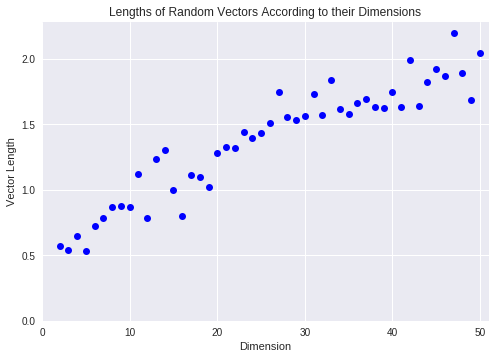

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#
# Vector Magnitude Challenge
# Your Code Here
#

for d in range(2, 51):
    v = np.array(np.random.random(d)-0.5)
    norm = np.linalg.norm(v)
    plt.plot(d, norm, 'bo')
    
plt.title('Lengths of Random Vectors According to their Dimensions')
plt.xlim(0, 51)
plt.xlabel('Dimension')
plt.ylim(0)
plt.ylabel('Vector Length')
plt.show();

## Observations:

The expected norm of a vector sampled uniformly from (-0.5,0.5) appears to be proportional to the dimension of the vector. To confirm this, we can sample large amounts of vectors per dimension and use their mean norm as an approximation of the expected value of the norm.

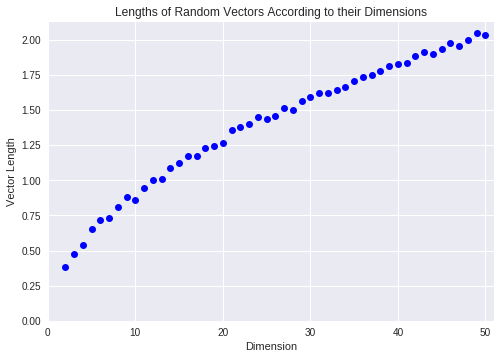

In [2]:
for d in range(2, 51):
    v = np.array(np.random.random((50, d))-0.5)
    norm = np.mean(np.linalg.norm(v, axis=1))
    plt.plot(d, norm, 'bo')
    
plt.title('Lengths of Random Vectors According to their Dimensions')
plt.xlim(0, 51)
plt.xlabel('Dimension')
plt.ylim(0)
plt.ylabel('Vector Length')
plt.show();

In order to test whether this relationship is linear, or something else such as norm being proportional to the square root or logarithm of the dimension, we can plot the averages of many norms over a larger range of dimensions.

We expect that the relationship will be that of a square root. Since the expected value of a squared normal distribution will be some constant, the expected value of the norm will be the square root of a certain number of those constants, where the number is the dimension of the vector

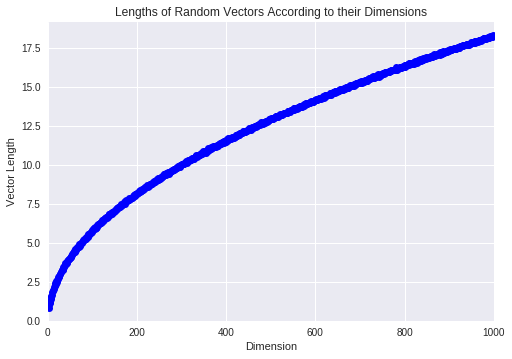

In [3]:
for d in range(2, 1000):
    v = np.array(np.random.random((50, d)))
    norm = np.mean(np.linalg.norm(v, axis=1))
    plt.plot(d, norm, 'bo')
    
plt.title('Lengths of Random Vectors According to their Dimensions')
plt.xlim(0, 1001)
plt.xlabel('Dimension')
plt.ylim(0)
plt.ylabel('Vector Length')
plt.show();

Sure enough, the curve appears to taper, indicating that the relationship is governed by a function with second derivative below zero. One way to discover the relationship is to various dimensions and observe how the norm changes. Another is to guess the function and scale the x axis by it and see if the plot becomes linear.

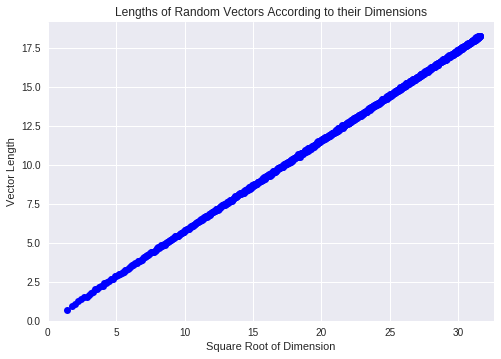

In [4]:
for d in range(2, 1000):
    v = np.array(np.random.random((50, d)))
    norm = np.mean(np.linalg.norm(v, axis=1))
    plt.plot(np.sqrt(d), norm, 'bo')
    
plt.title('Lengths of Random Vectors According to their Dimensions')
plt.xlim(0, np.sqrt(1000)+1)
plt.xlabel('Square Root of Dimension')
plt.ylim(0)
plt.ylabel('Vector Length')
plt.show();

This provides evidence that the expected norm of a uniformly sampled vector is proportional to the square root of the dimension.

To calculate the precise relationship, we note that $E[norm] = \sqrt{DE[X^2]} $, where D is the dimension of the vector and X is the uniformly distributed random variable from which the components of the vector are sampled.

$E[X^2] = \frac{1}{b-a}\int_{a}^{b} x^2 dx$, where a and b are the lower and upper bounds of the uniform distribution.

$E[X^2] = \frac{b^3 - a^3}{3(b-a)}$

$E[norm] = \sqrt{D\frac{b^3 - a^3}{3(b-a)}}$

In [0]:
def norm_random_vector(d, lower, upper):
    return np.sqrt(d*(upper**3 - lower**3)/(3*(upper-lower)))

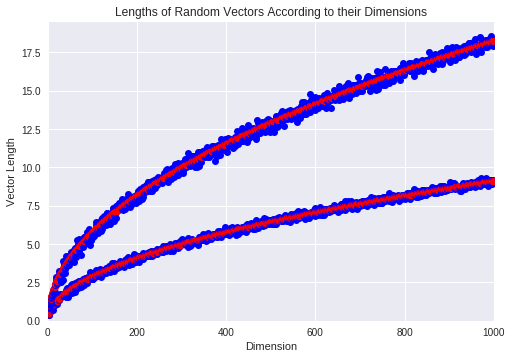

In [7]:
for a, b in zip([-0.5, 0], [0.5, 1]):    
    for d in range(2, 1000):
        v = np.random.uniform(a, b, (1, d))
        predicted = norm_random_vector(d, a, b)
        norm = np.mean(np.linalg.norm(v, axis=1))
        plt.plot(d, norm, 'bo')
        plt.plot(d, predicted, 'ro')
    
plt.title('Lengths of Random Vectors According to their Dimensions')
plt.xlim(0, 1001)
plt.xlabel('Dimension')
plt.ylim(0)
plt.ylabel('Vector Length')
plt.show();